In [1]:
!pip install simpletransformers
#!pip install tensorboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.8/258.8 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.

In [2]:
# Load drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Needed only for XLM model
!pip install sacremoses

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 5.6 MB/s eta 0:00:00


#### Importing Necessary Libraries

In [157]:
# Libraries
#import sacremoses
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from simpletransformers.ner import NERModel,NERArgs
#from torch.utils.tensorboard import SummaryWriter
import pandas as pd

#### Loading dataset

In [158]:
path = 'path_to_dataset' # add paths corresponding to ILPRL or EBIQUITY dataset
data = pd.read_csv(path,encoding="utf-8" )

In [159]:
data.head(5)

,sentence#,word,pos,ner
0,sentence: 1,0,CD,I-MISC
1,NaN,पृष्ठभूमि,NN,O
2,NaN,:,YM,O
3,NaN,विश्व,NN,O
4,NaN,का,PKO,O


In [160]:
data =data.fillna(method ="ffill")

In [161]:
data.head(5)

,sentence#,word,pos,ner
0,sentence: 1,0,CD,I-MISC
1,sentence: 1,पृष्ठभूमि,NN,O
2,sentence: 1,:,YM,O
3,sentence: 1,विश्व,NN,O
4,sentence: 1,का,PKO,O


#### Encoding sentence identifiers

In [162]:
data["sentence#"] = LabelEncoder().fit_transform(data["sentence#"] )

In [163]:
data.head(5)

,sentence#,word,pos,ner
0,0,0,CD,I-MISC
1,0,पृष्ठभूमि,NN,O
2,0,:,YM,O
3,0,विश्व,NN,O
4,0,का,PKO,O


#### Renaming columns name to labels

In [164]:
#Note that 'pos' should be used instead of 'ner' for POS tagging task
data.rename(columns={"sentence#":"sentence_id","word":"words","ner":"labels"}, inplace =True)

In [165]:
data.tail(5)

,sentence_id,words,pos,labels
13829,406,मा,PP,O
13830,406,समानता,NN,O
13831,406,छैन,VF,O
13832,406,भन्नुभयो,VF,O
13833,406,।,YF,O


In [166]:
data["labels"] = data["labels"].str.upper()

In [167]:
X= data[["sentence_id","words"]]
Y =data["labels"]

In [168]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, shuffle=True)

####Building train and test data

In [169]:
#building up train data and test data
train_data = pd.DataFrame({"sentence_id":x_train["sentence_id"],"words":x_train["words"],"labels":y_train})
test_data = pd.DataFrame({"sentence_id":x_test["sentence_id"],"words":x_test["words"],"labels":y_test})
print(len(train_data),len(test_data))

11067 2767


In [170]:
train_data

,sentence_id,words,labels
666,454,",",O
4416,32,जुन,O
8189,207,तर,O
705,454,1,I-MISC
6010,80,को,O
...,...,...,...
6169,87,भन्दा,O
1504,287,विदेशी,O
3181,15,।,O
6682,124,पनि,O


In [171]:
label = data["labels"].unique().tolist()
label

['I-MISC',
 'O',
 'B-LOC',
 'B-MISC',
 'I-LOC',
 'B-ORG',
 'I-ORG',
 'B-PER',
 'I-PER',
 'E-MISC',
 'V']

In [201]:
element_counts = data['labels'].value_counts()
# Print the counts of each unique element
print(element_counts)

O         12659
B-MISC      279
B-LOC       225
I-MISC      180
B-PER       144
I-ORG       118
I-PER       117
B-ORG        62
I-LOC        48
E-MISC        1
V             1
Name: labels, dtype: int64


#### Model Fine-tuning

In [172]:
# Model arguments and Parameters
args = NERArgs()
args.num_train_epochs = 5
args.learning_rate = 1e-4
args.overwrite_output_dir =True
args.train_batch_size = 8
args.eval_batch_size = 8
args.save_model_every_epoch=False

In [173]:
# Change according to model eg. 'xlmroberta', 'xlm-roberta-base'. Refer to simpletransformer docs and hugging face for more models
model = NERModel('bert', 'NepBERTa/NepBERTa',labels=label,args =args,use_cuda=True,from_tf=True)# remove 'from_tf=True' for other models

All TF 2.0 model weights were used when initializing BertForTokenClassification.

All the weights of BertForTokenClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertForTokenClassification for predictions without further training.


In [174]:
# Training the model
model.train_model(train_data,eval_data=test_data, acc=accuracy_score, verbose=True)

/usr/local/lib/python3.10/dist-packages/simpletransformers/ner/ner_utils.py:190: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  return [


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/59 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Running Epoch 2 of 5:   0%|          | 0/59 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/59 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/59 [00:00<?, ?it/s]

Running Epoch 5 of 5:   0%|          | 0/59 [00:00<?, ?it/s]

(295, 0.20382801251233382)

#### Evaluating Model

In [175]:
# Evaluating scores
result, model_outputs, preds_list = model.eval_model(test_data, verbose=True)

/usr/local/lib/python3.10/dist-packages/simpletransformers/ner/ner_utils.py:190: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  return [


  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/57 [00:00<?, ?it/s]

In [176]:
# Final result scores
result

{'eval_loss': 0.1778888351226781,
 'precision': 0.7990867579908676,
 'recall': 0.7261410788381742,
 'f1_score': 0.7608695652173914}

In [187]:
# Unique labels in test set
print(test_data['labels'].unique().tolist())
print(len(test_data['labels'].unique().tolist()))

['O', 'B-PER', 'I-ORG', 'B-LOC', 'B-MISC', 'I-MISC', 'I-PER', 'I-LOC', 'B-ORG']
9


In [194]:
# Total unique sentences in test set
unique_sentence = test_data['sentence_id'].unique().tolist()
print("Total number of unique sentences: "+ str(len(unique_sentence)))
print("Total number of predicted sentences: "+ str(len(unique_sentence)))
print(unique_sentence[:50])

Total number of unique sentences: 450
Total number of predicted sentences: 450
[415, 30, 169, 454, 14, 274, 141, 404, 426, 356, 39, 384, 280, 48, 394, 418, 101, 401, 333, 381, 0, 337, 311, 44, 349, 295, 374, 466, 98, 188, 162, 379, 263, 53, 166, 140, 38, 35, 183, 432, 184, 450, 342, 383, 439, 355, 128, 339, 428, 59]


In [195]:
# Group by sentence_id and aggregate labels into a list
grouped = test_data.groupby('sentence_id')['labels'].agg(list).reset_index()

# Convert the 'label' column to a nested list
actual_labels_list = grouped['labels'].tolist()



In [196]:
print(actual_labels_list[:50])

[['O', 'O', 'O', 'O', 'B-LOC', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-MISC', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'I-MISC', 'B-LOC', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['I-PER', 'B-MISC', 'B-LOC', 'O', 'O'], ['O', 'O', 'O', 'B-LOC', 'O'], ['O', 'O', 'O'], ['O', 'O', 'B-MISC'], ['B-LOC', 'O'], ['O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O'], ['O', 'O'], ['O', 'O'], ['B-PER', 'O', 'O', 'O', 'B-ORG'], ['O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O'], ['O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O'], ['O', 'O', 'O', 'B-PER', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O'], ['O', 'I-MISC', 'O', 'O', 'B-LOC'], ['O', 'O', 'O'], ['O'], ['O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

In [197]:
print(preds_list[:50])

[['O', 'O', 'O', 'O', 'B-LOC', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-MISC', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'I-MISC', 'B-LOC', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['I-PER', 'B-MISC', 'B-LOC', 'O', 'O'], ['O', 'O', 'O', 'B-LOC', 'O'], ['O', 'O', 'O'], ['O', 'O', 'B-MISC'], ['B-LOC', 'O'], ['O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O'], ['O', 'O'], ['O', 'O'], ['B-PER', 'O', 'O', 'O', 'B-PER'], ['O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O'], ['O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O'], ['O', 'B-PER'], ['O', 'O', 'O', 'B-PER', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O'], ['O', 'I-MISC', 'O', 'O', 'B-LOC'], ['O', 'O', 'O'], ['O'], ['O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O

#### Plot

In [198]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import numpy as np

# Flatten the lists
actual_flat = [item for sublist in actual_labels_list for item in sublist]
predicted_flat = [item for sublist in preds_list for item in sublist]

# Get unique labels
labels = np.unique(actual_flat)

# Compute confusion matrix
conf_matrix = confusion_matrix(actual_flat, predicted_flat, labels=labels)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  40    0    1    3    0    0    0    1    2]
 [   1   59    0    0    0    5    0    0    5]
 [   3    0    2    1    0    0    0    1    3]
 [   0    0    0   23    0    0    0    4   11]
 [   2    0    0    0    4    1    0    0    6]
 [   0    2    0    0    0   23    0    1    7]
 [   0    0    0    2    0    0    8    0   11]
 [   0    0    0    2    0    0    0   12    2]
 [   3    4    2    5    3    2    4    2 2494]]


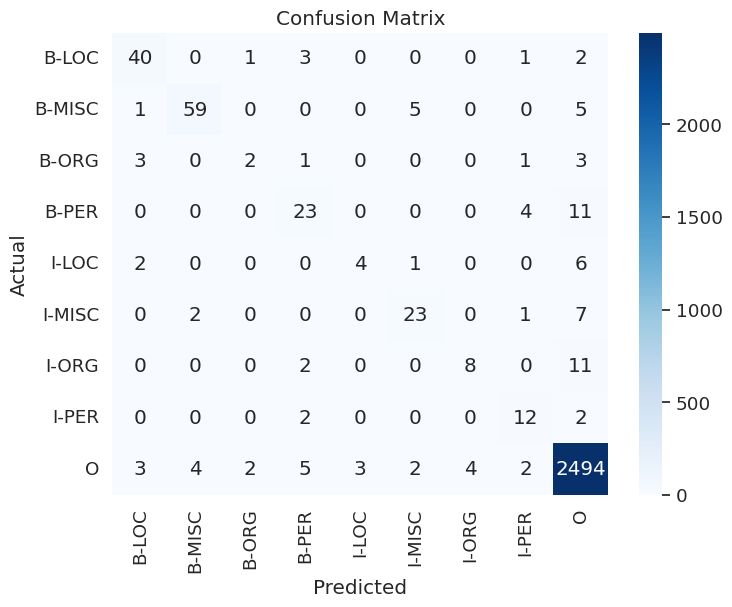

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, labels)
